In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
import kagglehub

import kagglehub
import os
os.environ["KAGGLE_DATA_DIR"] = "/data/orlando/home/mortaza/.cache/kagglehub"
# Download latest version
full_data = kagglehub.dataset_download("paultimothymooney/breast-histopathology-images")

print("Path to files:", full_data)

100%|██████████| 3.10G/3.10G [00:38<00:00, 85.5MB/s]

Extracting files...


Path to files: /root/.cache/kagglehub/datasets/paultimothymooney/breast-histopathology-images/versions/1


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import glob
from tqdm import tqdm

In [8]:
breast_img = glob.glob('/root/.cache/kagglehub/datasets/paultimothymooney/breast-histopathology-images/versions/1/IDC_regular_ps50_idx5/**/*.png', recursive = True)

for imgname in breast_img[:3]:
    print(imgname)


/root/.cache/kagglehub/datasets/paultimothymooney/breast-histopathology-images/versions/1/IDC_regular_ps50_idx5/8984/1/8984_idx5_x1851_y1351_class1.png
/root/.cache/kagglehub/datasets/paultimothymooney/breast-histopathology-images/versions/1/IDC_regular_ps50_idx5/8984/1/8984_idx5_x2001_y1501_class1.png
/root/.cache/kagglehub/datasets/paultimothymooney/breast-histopathology-images/versions/1/IDC_regular_ps50_idx5/8984/1/8984_idx5_x2351_y1101_class1.png


In [9]:
normal = []
cancer = []

for img in breast_img:
    if img[-5] == '0' :

        normal.append(img)

    elif img[-5] == '1' :
        cancer.append(img)

In [10]:
len(normal),len(cancer)

(198738, 78786)

In [64]:
image_paths = normal + cancer
labels = ['0'] * len(normal) + ['1'] * len(cancer)
df = pd.DataFrame({'filename': image_paths, 'label': labels})

In [63]:
labels[:]

['1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1'

In [68]:
df

,filename,label
0,/root/.cache/kagglehub/datasets/paultimothymoo...,0
1,/root/.cache/kagglehub/datasets/paultimothymoo...,0
2,/root/.cache/kagglehub/datasets/paultimothymoo...,0
3,/root/.cache/kagglehub/datasets/paultimothymoo...,0
4,/root/.cache/kagglehub/datasets/paultimothymoo...,0
...,...,...
277519,/root/.cache/kagglehub/datasets/paultimothymoo...,1
277520,/root/.cache/kagglehub/datasets/paultimothymoo...,1
277521,/root/.cache/kagglehub/datasets/paultimothymoo...,1
277522,/root/.cache/kagglehub/datasets/paultimothymoo...,1


In [69]:

df_label_1 = df[df['label'] != 1]
df_label_1


,filename,label
0,/root/.cache/kagglehub/datasets/paultimothymoo...,0
1,/root/.cache/kagglehub/datasets/paultimothymoo...,0
2,/root/.cache/kagglehub/datasets/paultimothymoo...,0
3,/root/.cache/kagglehub/datasets/paultimothymoo...,0
4,/root/.cache/kagglehub/datasets/paultimothymoo...,0
...,...,...
277519,/root/.cache/kagglehub/datasets/paultimothymoo...,1
277520,/root/.cache/kagglehub/datasets/paultimothymoo...,1
277521,/root/.cache/kagglehub/datasets/paultimothymoo...,1
277522,/root/.cache/kagglehub/datasets/paultimothymoo...,1


In [61]:
df['label'].value_counts()

,count
label,
1,277524


In [19]:
from sklearn.model_selection import train_test_split
train_df,test_df = train_test_split(df, test_size=0.2, random_state=42)

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,  # Small rotation
    horizontal_flip=True,
    vertical_flip=True,  # Histopathology images are not orientation-sensitive
    brightness_range=[0.8, 1.2],  # Adjust brightness
    zoom_range=0.1,  # Small zoom to focus on different regions
    validation_split=0.2
)


test_datagen = ImageDataGenerator(rescale=1.0/255)

In [25]:
train_generator = train_datagen.flow_from_dataframe(
    train_df,
    x_col='filename',
    y_col='label',
    target_size=(50, 50),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

val_generator = train_datagen.flow_from_dataframe(
    train_df,
    x_col='filename',
    y_col='label',
    target_size=(50, 50),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

test_generator = test_datagen.flow_from_dataframe(
    test_df,
    x_col='filename',
    y_col='label',
    target_size=(50, 50),
    batch_size=32,
    class_mode='binary',
    shuffle=False  # Don't shuffle test data
)

# Check dataset sizes
print(f"Training samples: {train_generator.samples}")
print(f"Validation samples: {val_generator.samples}")
print(f"Testing samples: {test_generator.samples}")

Found 177616 validated image filenames belonging to 2 classes.
Found 44403 validated image filenames belonging to 2 classes.
Found 55505 validated image filenames belonging to 2 classes.
Training samples: 177616
Validation samples: 44403
Testing samples: 55505


In [26]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Dropout, BatchNormalization, Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [29]:

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(50, 50, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.3))
model.add(Dense(24, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid'))
model.compile(Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 50, 50, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 50, 50, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 50, 50, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 25, 25, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 25, 25, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 25, 25, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 25, 25, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 25, 25, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 25, 25, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_15               │ (None, 25, 25, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 18432)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │       2,359,424 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_16               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_17               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 2,514,385 (9.59 MB)

 Trainable params: 2,513,617 (9.59 MB)

 Non-trainable params: 768 (3.00 KB)

In [30]:
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, mode='min')
history=model.fit(train_generator, validation_data=val_generator, epochs=5)

Epoch 1/5
5551/5551 ━━━━━━━━━━━━━━━━━━━━ 403s 71ms/step - accuracy: 0.8092 - loss: 0.4291 - val_accuracy: 0.8294 - val_loss: 0.3814
Epoch 2/5
5551/5551 ━━━━━━━━━━━━━━━━━━━━ 351s 63ms/step - accuracy: 0.8450 - loss: 0.3586 - val_accuracy: 0.8524 - val_loss: 0.3561
Epoch 3/5
5551/5551 ━━━━━━━━━━━━━━━━━━━━ 344s 62ms/step - accuracy: 0.8540 - loss: 0.3406 - val_accuracy: 0.8566 - val_loss: 0.3331
Epoch 4/5
5551/5551 ━━━━━━━━━━━━━━━━━━━━ 340s 61ms/step - accuracy: 0.8593 - loss: 0.3289 - val_accuracy: 0.8639 - val_loss: 0.3206
Epoch 5/5
5551/5551 ━━━━━━━━━━━━━━━━━━━━ 381s 61ms/step - accuracy: 0.8633 - loss: 0.3207 - val_accuracy: 0.8683 - val_loss: 0.3135


In [37]:
y_test_true = test_generator.classes

y_test_probs = model.predict(test_generator)

y_test_pred = [0 if 0.5>=i[0] else 1 for i in y_test_probs]


1735/1735 ━━━━━━━━━━━━━━━━━━━━ 24s 14ms/step


In [46]:
y_test_true[:10],y_test_pred[:10],y_test_probs[:10]

([1, 0, 1, 0, 0, 0, 0, 0, 1, 1],
 [1, 0, 0, 0, 0, 0, 0, 0, 1, 1],
 array([[0.64501613],
        [0.20205419],
        [0.17140143],
        [0.11369471],
        [0.01854903],
        [0.0799167 ],
        [0.01392318],
        [0.02777834],
        [0.5886404 ],
        [0.7848109 ]], dtype=float32))

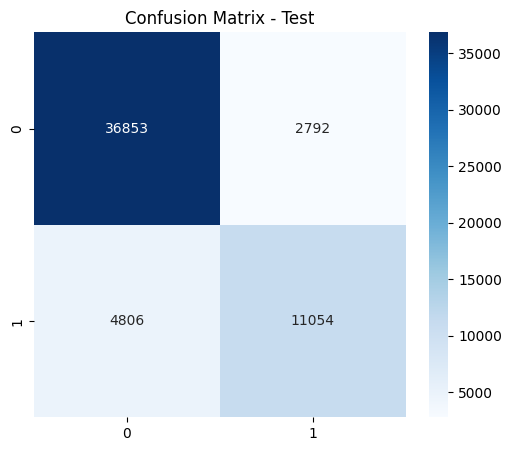

Classification Report - Test
              precision    recall  f1-score   support

           0       0.88      0.93      0.91     39645
           1       0.80      0.70      0.74     15860

    accuracy                           0.86     55505
   macro avg       0.84      0.81      0.83     55505
weighted avg       0.86      0.86      0.86     55505



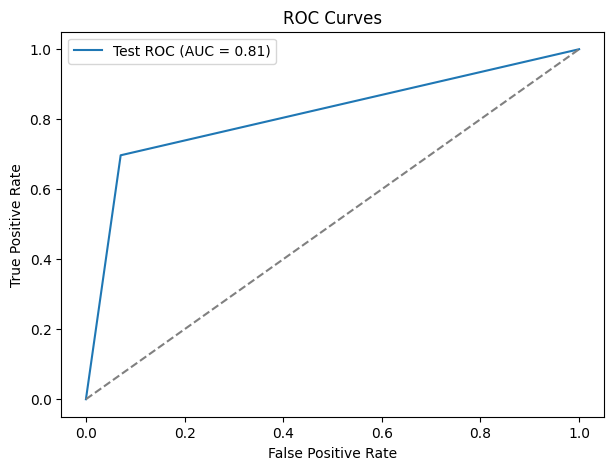

1735/1735 ━━━━━━━━━━━━━━━━━━━━ 25s 15ms/step - accuracy: 0.8610 - loss: 0.3329
Test Loss: 0.3290
Test Accuracy: 0.8631


In [39]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc





plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test_true, y_test_pred), annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix - Test')
plt.show()


print("Classification Report - Test")
print(classification_report(y_test_true, y_test_pred))


fpr_test, tpr_test, _ = roc_curve(y_test_true, y_test_pred)

plt.figure(figsize=(7, 5))
plt.plot(fpr_test, tpr_test, label=f'Test ROC (AUC = {auc(fpr_test, tpr_test):.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()

test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")





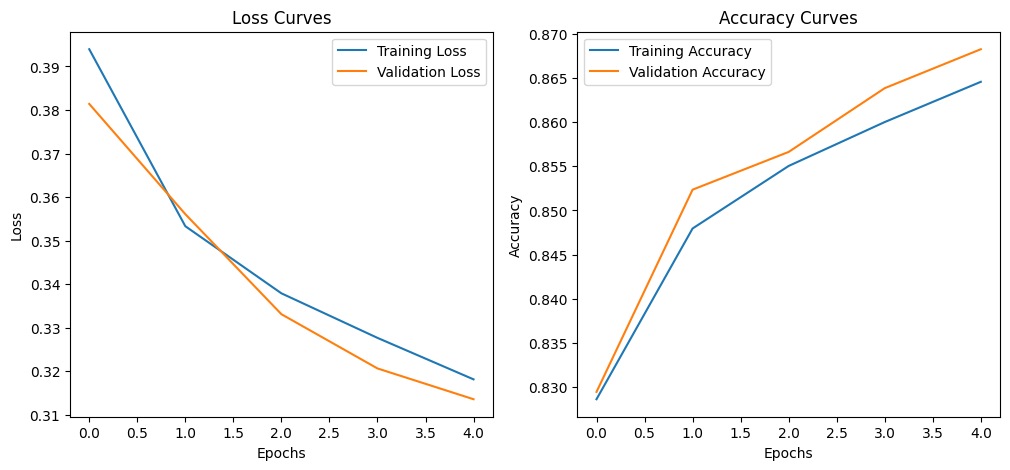

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curves')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Curves')
plt.legend()

plt.show()


In [77]:
model.save('/content/drive/MyDrive/breast_cancer/pathology_model.h5')

In [42]:
import tensorflow as tf
loaded_model=tf.keras.models.load_model('/content/drive/MyDrive/breast_cancer/pathology_model.h5')

In [78]:
test_path='PM1.png'
img = cv2.imread(test_path, cv2.IMREAD_COLOR)
img = cv2.resize(img,(50, 50))
img = img / 255.0
img = np.expand_dims(img, axis=0)
prob=loaded_model.predict(img)
pred=0 if prob<=0.5 else 1
print(pred,prob)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1 [[0.5045998]]
